<a href="https://colab.research.google.com/github/wondoro/MBA6636_SM22_dataset/blob/main/F25_I01_Entropy_Gini_Wycliffe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
data = 'https://raw.githubusercontent.com/wondoro/datasets/refs/heads/main/coffee.csv'

In [ ]:
coffeeData = pd.read_csv(data)

In [ ]:
coffeeData.head()

,Unnamed: 0,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,0,36,Female,0,24,73,42789,0.003168,0,1.0
1,1,24,Male,0,44,164,74035,0.520906,0,NaN
2,2,24,Male,0,39,119,30563,0.916005,1,1.0
3,3,20,Male,0,30,107,13166,0.932098,1,NaN
4,4,24,Female,0,20,36,14244,0.965881,0,1.0


In [ ]:
coffeeData.shape

(702, 10)

In [ ]:
coffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               702 non-null    int64  
 1   Age                      702 non-null    int64  
 2   Gender                   702 non-null    object 
 3   num_coffeeBags_per_year  702 non-null    int64  
 4   spent_week               702 non-null    int64  
 5   spent_month              702 non-null    int64  
 6   SlrAY                    702 non-null    int64  
 7   Distance                 702 non-null    float64
 8   Online                   702 non-null    int64  
 9   Decision                 474 non-null    float64
dtypes: float64(2), int64(7), object(1)
memory usage: 55.0+ KB


In [ ]:
coffeeData.describe(include= 'all')

,Unnamed: 0,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
unique,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,350.500000,34.243590,NaN,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,202.794231,13.927945,NaN,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,0.000000,16.000000,NaN,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,175.250000,23.000000,NaN,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,350.500000,28.000000,NaN,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,525.750000,46.000000,NaN,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000


In [ ]:
coffeeData.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week',
       'spent_month', 'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [ ]:
coffeeData.rename(columns = {"spent_month":"spent_last_month", "spent_week":"spent_last_week", "SlrAY":"Salary"},
            inplace = True )

In [ ]:
coffeeData.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'num_coffeeBags_per_year',
       'spent_last_week', 'spent_last_month', 'Salary', 'Distance', 'Online',
       'Decision'],
      dtype='object')

In [ ]:
coffeeData["Gender"].describe()

,Gender
count,702
unique,9
top,Male
freq,355


In [ ]:
coffeeData["Gender"].unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

In [ ]:
coffeeData["Gender"] = coffeeData["Gender"].replace(["female", "f ", "FEMALE", "F"], "Female")

In [ ]:
coffeeData["Gender"].unique()

array(['Female', 'Male', 'MALE', 'male', 'M'], dtype=object)

In [ ]:
coffeeData["Gender"] = coffeeData["Gender"].replace(["MALE", "male", "M"], "Male")

In [ ]:
coffeeData["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
coffeeData['Decision'].unique()

array([ 1., nan,  0.])

In [ ]:
coffeeData["Decision"] = coffeeData["Decision"].replace(1.0, "YES")
coffeeData["Decision"] = coffeeData["Decision"].replace(0.0, "NO")
coffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               702 non-null    int64  
 1   Age                      702 non-null    int64  
 2   Gender                   702 non-null    object 
 3   num_coffeeBags_per_year  702 non-null    int64  
 4   spent_last_week          702 non-null    int64  
 5   spent_last_month         702 non-null    int64  
 6   Salary                   702 non-null    int64  
 7   Distance                 702 non-null    float64
 8   Online                   702 non-null    int64  
 9   Decision                 474 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 55.0+ KB


In [ ]:
coffeeData["Decision"].unique()

array(['YES', nan, 'NO'], dtype=object)

In [ ]:
coffeeData['Decision'].describe()

,Decision
count,474
unique,2
top,YES
freq,303


In [ ]:
NOPrediction = coffeeData.dropna()
NOPrediction["Decision"].describe()

,Decision
count,474
unique,2
top,YES
freq,303


In [ ]:
NOPrediction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 0 to 701
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               474 non-null    int64  
 1   Age                      474 non-null    int64  
 2   Gender                   474 non-null    object 
 3   num_coffeeBags_per_year  474 non-null    int64  
 4   spent_last_week          474 non-null    int64  
 5   spent_last_month         474 non-null    int64  
 6   Salary                   474 non-null    int64  
 7   Distance                 474 non-null    float64
 8   Online                   474 non-null    int64  
 9   Decision                 474 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 40.7+ KB


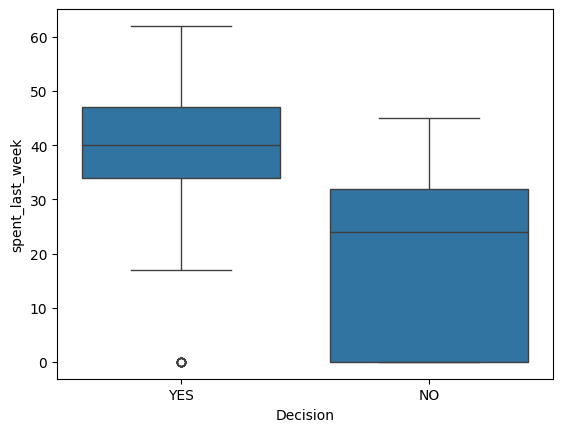

In [ ]:
sns.boxplot(y="spent_last_week", x= "Decision", data=NOPrediction)
plt.show()

Can you admissibly conclude anything from this boxplot? Write your answer here:

If the customer has recently bought a product then they are likely to want to buy Hidden Farm chinese coffee too

<Axes: xlabel='Distance', ylabel='spent_last_month'>

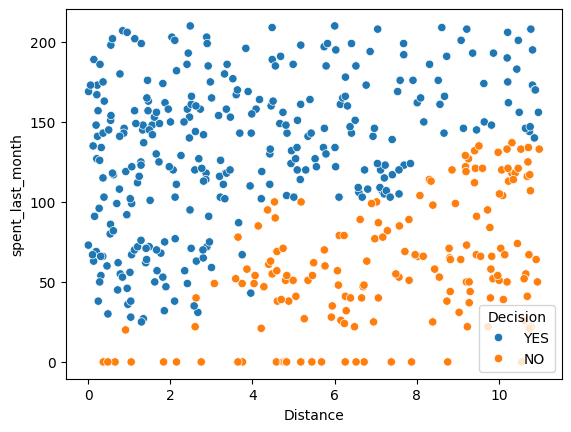

In [ ]:
sns.scatterplot(y="spent_last_month", x= "Distance", hue = "Decision", data =NOPrediction)

Can you admissibly conclude anything from this scatterplot? Remember: we are trying to build a tree to classify unseen examples. Write your answer here:

the shorter the distance the more likely that the decision is yes. But there seems to be no correlation on distance and the amount spent last month

In [ ]:
Prediction = coffeeData[pd.isnull(coffeeData["Decision"])]
Prediction.head()

,Unnamed: 0,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Decision
1,1,24,Male,0,44,164,74035,0.520906,0,NaN
3,3,20,Male,0,30,107,13166,0.932098,1,NaN
7,7,24,Female,0,20,34,17425,1.193188,0,NaN
11,11,24,Female,0,40,153,84803,1.655096,1,NaN
12,12,21,Female,0,38,122,42338,1.714179,1,NaN


In [ ]:
Prediction.describe(include='all')

,Unnamed: 0,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Decision
count,228.000000,228.000000,228,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,0
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,0
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,372.298246,31.802632,NaN,2.960526,33.394737,110.407895,41923.741228,3.428836,0.570175,NaN
std,206.993602,14.302293,NaN,1.585514,15.697930,53.786536,27406.768360,2.153102,0.496140,NaN
min,1.000000,16.000000,NaN,0.000000,0.000000,0.000000,1617.000000,0.010048,0.000000,NaN
25%,221.500000,22.000000,NaN,2.000000,25.750000,65.000000,15911.500000,1.699408,0.000000,NaN
50%,369.500000,25.000000,NaN,3.000000,37.000000,113.500000,40987.500000,3.208673,1.000000,NaN
75%,543.000000,39.000000,NaN,4.000000,44.000000,151.250000,58537.000000,5.261184,1.000000,NaN


In [ ]:
NOPrediction.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'num_coffeeBags_per_year',
       'spent_last_week', 'spent_last_month', 'Salary', 'Distance', 'Online',
       'Decision'],
      dtype='object')

In [ ]:
features = ["Age", "Gender", "num_coffeeBags_per_year", "spent_last_week", "spent_last_month",
       "Salary", "Distance", "Online"]

In [ ]:
X = NOPrediction[features]

In [ ]:
y = NOPrediction.Decision

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size = 0.25,
                                                  random_state = 246)

In [ ]:
y_train.describe()

,Decision
count,355
unique,2
top,YES
freq,225


In [ ]:
X_train = pd.get_dummies(X_train)

In [ ]:
X_test = pd.get_dummies(X_test)

In [ ]:
rs = 0
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = rs)

In [ ]:
entr_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = entr_model.predict(X_test)

In [ ]:
y_pred = pd.Series(y_pred)

In [ ]:
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
dot_data = StringIO()

In [ ]:
tree.export_graphviz(entr_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,
                class_names = ["NO", "YES"])

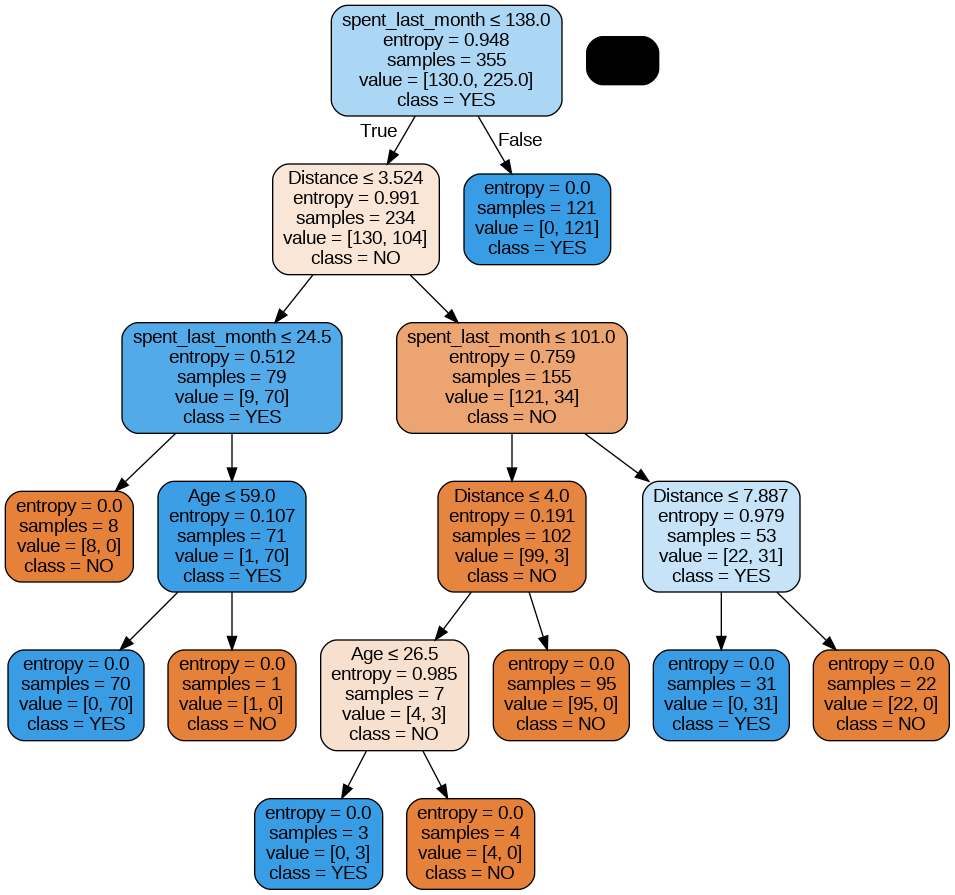

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - no max depth
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes" 0.9873417721518988
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 0.975609756097561


In [ ]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state= rs)

In [ ]:
gini_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = gini_model.predict(X_test)

In [ ]:
y_pred = pd.Series(y_pred)

In [ ]:
gini_model

DecisionTreeClassifier(random_state=0)

In [ ]:
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

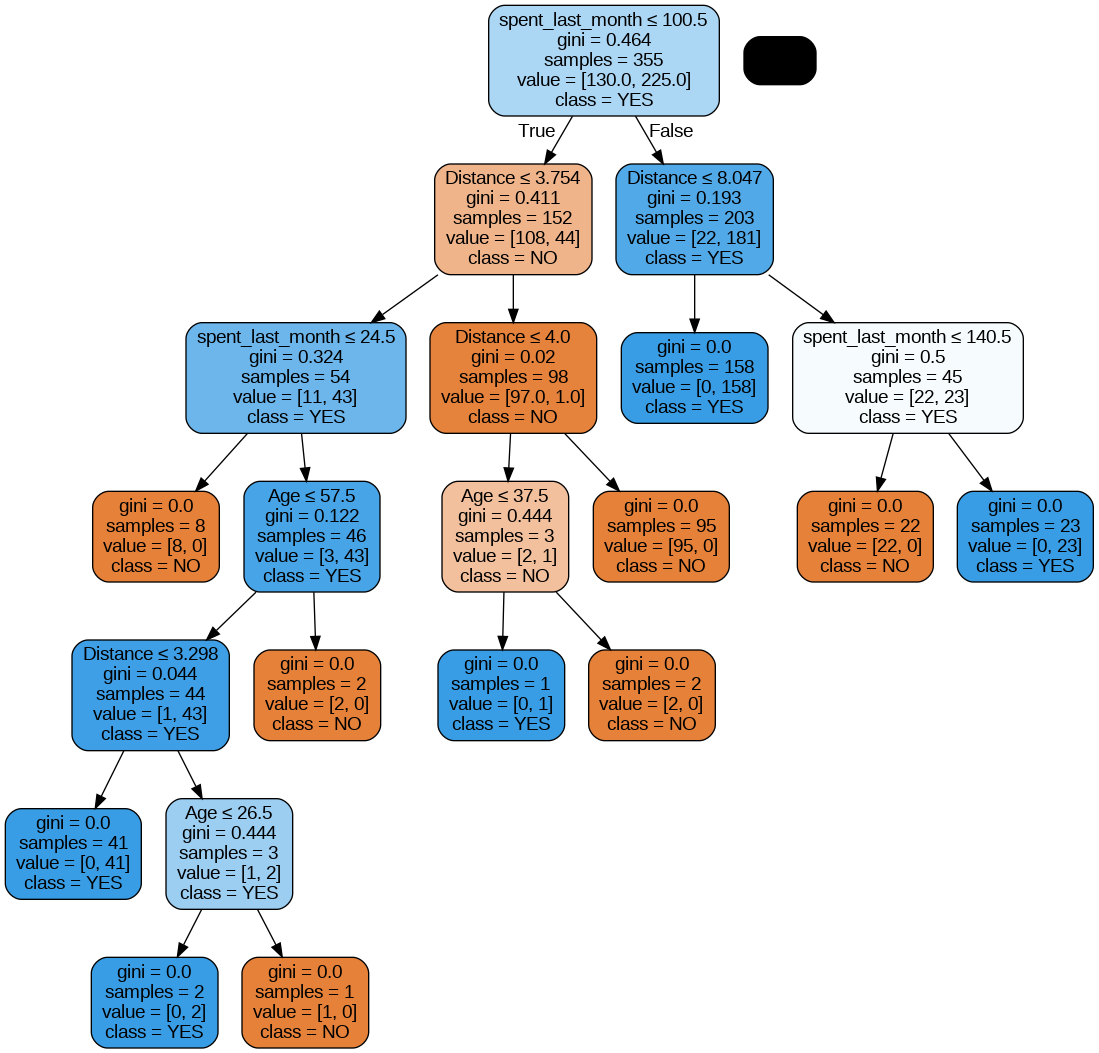

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Gini impurity model
Accuracy: 0.9831932773109243
Balanced accuracy: 0.9813946216385241
Precision score 0.9871794871794872
Recall score 0.975609756097561


How do the results here compare to the previous model? Write your judgements here:

Entropy model has higher total accuracy and balanced accuracy